# t-distributed Stochastic Neighbor Embedding
lower dimension representation without losing the og characteristics of the data

CONTENTS:

1. [Accessing the dataset](#acc)
2. [Plotting the images](#plot)
3. [Creating a random sample of 1k from 70k rows](#sample)
4. [Creating a new set of 1000](#set)
5. [Building the TSNE model](#tsne)
6. [Visualization of the transformed points](#trans)
7. [Creating a dataframe for better visualization](#df)
8. [Exercise](#ex)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

<a id = acc></a>
## Accessing the dataset

In [2]:
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)

C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [6]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

<a id = plot></a>
## Plotting the images

In [8]:
X.iloc[1]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 1, Length: 784, dtype: float64

Text(0.5, 1.0, '0')

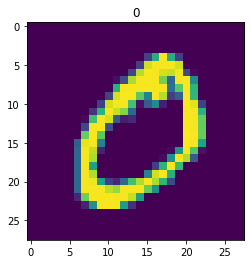

In [10]:
plt.imshow(X.iloc[1].to_numpy().reshape(28, 28)) # Converting 1st row in dataframe X to numpy 
                                                 # so as to reshape it in the dimensions of the image
plt.title(y[1])

Text(0.5, 1.0, '3')

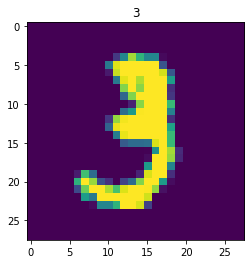

In [11]:
plt.imshow(X.iloc[10].to_numpy().reshape(28, 28)) # Converting 1st row in dataframe X to numpy 
                                                 # so as to reshape it in the dimensions of the image
plt.title(y[10])

Text(0.5, 1.0, '3')

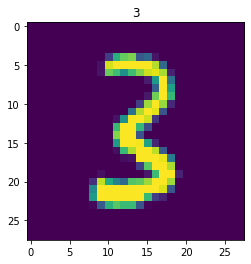

In [12]:
plt.imshow(X.iloc[50000].to_numpy().reshape(28, 28)) # Converting 1st row in dataframe X to numpy 
                                                 # so as to reshape it in the dimensions of the image
plt.title(y[50000])

<a id = sample></a>
## Creating a random sample of 1k from 70k rows

In [13]:
np.random.seed(100)

In [14]:
sample = np.random.choice(X.shape[0], 1000) # a random choice of 1000 out of 70000 rows (X.shape[0])

In [20]:
sample

array([38408, 56088, 65615, 63370, 14260, 20533, 13890, 49954, 59243,
       17724,  7738, 42491, 38537,  6230, 30596, 27039, 21377, 35981,
        6901, 54995, 10843, 44463, 21243, 52560, 49154, 66425, 35294,
       26003, 12571, 61240, 23790, 62833, 20382, 68528, 11567, 32423,
         806, 10412, 18624, 23480, 53685,  1738, 40977,   488, 19803,
       31195, 30675, 47950, 48128, 30156, 36995,  1667, 25812, 57738,
       46295, 28150, 53743, 32700, 52073, 46256, 46891,  6182,  5290,
        6239, 14650, 14438, 63894,  7424, 42679, 41186,  4914, 63907,
       29079, 32265, 36336, 50965, 24985, 52662, 34469, 62650, 18142,
        5939,  2626,  4535, 34905,   429, 66576, 11730, 14957, 24556,
       44255, 41748, 39050, 38302, 67468, 19445, 66909, 23415,   556,
       58425,  6527, 25344,  9960, 35804, 30530, 16016, 42373, 49498,
       50014, 69844, 30579, 65684, 36376, 18874, 45852, 56018, 44679,
       10815, 56450, 46295, 28817, 11994, 25053, 26698, 28085, 34590,
       68675, 42890,

<a id = set></a>
## Creating a new set of 1000

In [16]:
X1 = X.iloc[sample,:]

In [17]:
X1.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
38408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y1 = y[sample]

In [19]:
y1.head()

38408    5
56088    2
65615    2
63370    4
14260    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

<a id = tsne></a>
## Building the TSNE model


In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 30)

In [22]:
X_tsne = tsne.fit_transform(X1)
X_tsne.shape

(1000, 2)

784 dimensiosn converted to 2 dimensions

In [23]:
X_tsne[0]

array([-22.593616,   9.286298], dtype=float32)

<a id = trans></a>
## Visualization of the transformed points

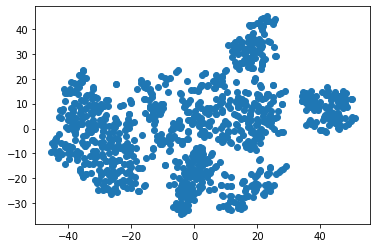

In [25]:
plt.scatter(X_tsne[:,0], X_tsne[:,1]);

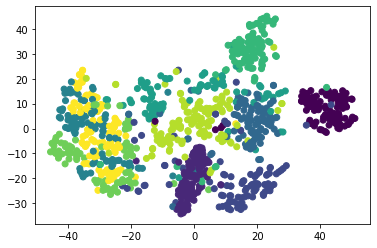

In [31]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = y1.astype('float'));

<a id = df></a>
## Creating a dataframe for better visualization

In [27]:
X_df = pd.DataFrame({'X0':X_tsne[:,0],
               'X1':X_tsne[:,1],
                'Label':y1})
X_df

,X0,X1,Label
38408,-22.593616,9.286298,5
56088,10.362753,-22.912664,2
65615,13.740941,-31.857513,2
63370,-36.886909,13.769342,4
14260,-42.706047,7.497481,4
...,...,...,...
43545,17.044008,26.820789,6
6051,-27.211948,-18.603712,9
22851,20.319103,30.719664,6
65851,-28.320038,3.943775,4


<Figure size 1080x864 with 0 Axes>

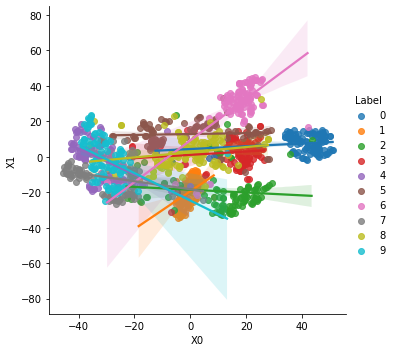

In [32]:
plt.figure(figsize = (15, 12))
sns.lmplot(data = X_df, x = 'X0', y = 'X1', hue = 'Label');

<Figure size 1080x864 with 0 Axes>

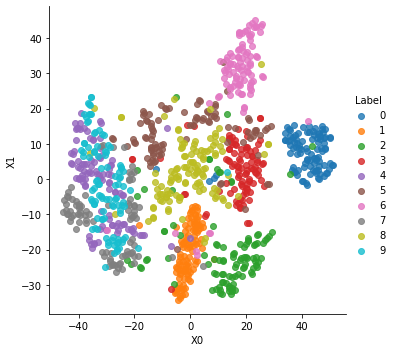

In [34]:
plt.figure(figsize = (15, 12))
sns.lmplot(data = X_df, 
           x = 'X0', 
           y = 'X1', 
           hue = 'Label',
           fit_reg = False);

<a id = ex></a>
### Exercise ==> Perform tSNE on wine dataset